In [1]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Ensure required downloads
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Load your data
input_csv = "SCRAPED_BUSINESS_DAY.csv"  # change this to your actual file
df = pd.read_csv(input_csv)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Gracious\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Gracious\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Gracious\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Gracious\AppData\Roaming\nltk_data...


##  Basic Data Checks & Exploration

## 🧪 Preview Data




In [8]:
df.head()         # First 5 rows
df.tail()         # Last 5 rows


,URL,Title,Author,Published Date,Content,Summary,Keywords,Sentiment,Polarity Score
5896,https://businessday.ng/business-economy/articl...,Ogun partners Germany on vocational training,NaN,"March 3, 2013",The Ogun State Government has entered into par...,The Ogun State Government has entered into par...,renowned ‘ german dual vocational training ’ n...,Positive,0.9725
5897,https://businessday.ng/business-economy/articl...,"N8trn lost to illicit gold mining, FG bemoans",NaN,"March 3, 2013","In two years, Nigeria has lost about N8 trilli...","In two years, Nigeria has lost about N8 trilli...",regulatory failures cost nigeria revenue losse...,Negative,-0.8777
5898,https://businessday.ng/business-economy/articl...,YECCIMA seeks international collaboration for ...,NaN,"March 3, 2013",In order to create avenue for the export of lo...,In order to create avenue for the export of lo...,collaboration would also enhance local busines...,Positive,0.9802
5899,https://businessday.ng/business-economy/articl...,Trade in foreign stocks offers better returns ...,NaN,"March 3, 2013",Chinedu Michael is a dashing young CEO. At les...,Chinedu Michael is a dashing young CEO. At les...,"nigerian stocks 2008 – 2009 crash, 2009 nigeri...",Positive,0.9755
5900,https://businessday.ng/business-economy/articl...,Reps uncover N6.9bn un-remitted FG revenue by ...,NaN,"February 26, 2013",The House of Representatives’ Committee on Fin...,The House of Representatives’ Committee on Fin...,"abuja airport faan says n580bn needed, repair ...",Positive,0.9777


## 📏 Shape & Structure¶

In [10]:
df.shape          # (rows, columns)
df.columns        # List of column names
df.info()         # Data types, non-null counts
df.describe()     # Summary stats for numeric columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5901 entries, 0 to 5900
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   URL             5901 non-null   object 
 1   Title           5900 non-null   object 
 2   Author          0 non-null      float64
 3   Published Date  5901 non-null   object 
 4   Content         5901 non-null   object 
 5   Summary         5901 non-null   object 
 6   Keywords        5901 non-null   object 
 7   Sentiment       5901 non-null   object 
 8   Polarity Score  5901 non-null   float64
dtypes: float64(2), object(7)
memory usage: 415.0+ KB


,Author,Polarity Score
count,0.0,5901.000000
mean,NaN,0.565509
std,NaN,0.728075
min,NaN,-0.999900
25%,NaN,0.624900
50%,NaN,0.969800
75%,NaN,0.992400
max,NaN,1.000000


## 🔎 Check for Missing Values



In [17]:
df.isnull().sum()        # Null count per column
df[df['Content'].isnull()]  # View rows where content is missing


,URL,Title,Author,Published Date,Content,Summary,Keywords,Sentiment,Polarity Score


## unique values

In [20]:
df['Sentiment'].unique()     # Unique sentiment labels
df['Author'].value_counts()  # Count articles per author


Series([], Name: count, dtype: int64)

## find duplicates

In [24]:
df.duplicated().sum()        # Total duplicate rows
df[df.duplicated()]          # View duplicate rows


,URL,Title,Author,Published Date,Content,Summary,Keywords,Sentiment,Polarity Score


In [26]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# === NLTK Downloads ===
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')

# === Load Existing CSV ===
input_csv = "SCRAPED_BUSINESS_DAY.csv"  # Change to your actual file
df = pd.read_csv(input_csv)

# === Preprocessing Setup ===
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = str(text).lower()  # Ensure string and lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = word_tokenize(text)
    clean_tokens = [
        lemmatizer.lemmatize(word)
        for word in tokens
        if word not in stop_words and word.isalpha()
    ]
    return " ".join(clean_tokens)

# === Apply Preprocessing ===
df["Cleaned Content"] = df["Content"].astype(str).apply(preprocess_text)

# === Re-run VADER Sentiment Analysis ===
analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    scores = analyzer.polarity_scores(text)
    polarity = scores['compound']
    sentiment = (
        "Positive" if polarity >= 0.05 else
        "Negative" if polarity <= -0.05 else
        "Neutral"
    )
    return pd.Series([sentiment, polarity])

df[["Cleaned Sentiment", "Cleaned Polarity"]] = df["Cleaned Content"].apply(analyze_sentiment)

# === Save to New CSV ===
output_csv = input_csv.replace(".csv", "_cleaned_with_sentiment.csv")
df.to_csv(output_csv, index=False)

print(f"✅ All done! Cleaned data with new sentiment saved to: {output_csv}")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Gracious\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Gracious\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Gracious\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Gracious\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Gracious\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


✅ All done! Cleaned data with new sentiment saved to: SCRAPED_BUSINESS_DAY_cleaned_with_sentiment.csv


## Load the cleaned data set

In [42]:
import pandas as pd

df = pd.read_csv("SCRAPED_BUSINESS_DAY_cleaned_with_sentiment.csv") 


In [44]:
print(df.columns)


Index(['URL', 'Title', 'Author', 'Published Date', 'Content', 'Summary',
       'Keywords', 'Sentiment', 'Polarity Score', 'Cleaned Content',
       'Cleaned Sentiment', 'Cleaned Polarity'],
      dtype='object')


In [46]:
df[["Title", "Sentiment", "Cleaned Sentiment"]].head()


,Title,Sentiment,Cleaned Sentiment
0,$1trn economy: CBN insists banking sector esse...,Positive,Positive
1,Five things to know as Fitch upgrades Nigeria’...,Positive,Positive
2,"Diagana, World Bank’s regional vice president ...",Positive,Positive
3,MAN advocates five-year tax free policy to boo...,Positive,Positive
4,Fitch upgrades Nigeria to B on back of string ...,Negative,Positive


In [48]:
df.head()

,URL,Title,Author,Published Date,Content,Summary,Keywords,Sentiment,Polarity Score,Cleaned Content,Cleaned Sentiment,Cleaned Polarity
0,https://businessday.ng/business-economy/articl...,$1trn economy: CBN insists banking sector esse...,NaN,"April 14, 2025",…says investors responding to FX stability Abu...,…says investors responding to FX stability Abu...,programmes .” share join businessday whatsapp ...,Positive,0.9962,say investor responding fx stability abuja rac...,Positive,0.9965
1,https://businessday.ng/news/article/five-thing...,Five things to know as Fitch upgrades Nigeria’...,NaN,"April 13, 2025","Nigeria’s credit rating was upgraded to ‘B’, h...","Nigeria’s credit rating was upgraded to ‘B’, h...",highlighting public finance management challen...,Positive,0.9801,nigeria credit rating upgraded b highlighting ...,Positive,0.9889
2,https://businessday.ng/business-economy/articl...,"Diagana, World Bank’s regional vice president ...",NaN,"April 12, 2025",The World Bank’s Regional Vice President for W...,The World Bank’s Regional Vice President for W...,16 billion currently committed across 28 activ...,Positive,0.9931,world bank regional vice president western cen...,Positive,0.9926
3,https://businessday.ng/business-economy/articl...,MAN advocates five-year tax free policy to boo...,NaN,"April 12, 2025",The Manufacturers Association of Nigeria (MAN)...,The Manufacturers Association of Nigeria (MAN)...,obi urges political leaders russian intelligen...,Positive,0.9943,manufacturer association nigeria man urged fed...,Positive,0.9904
4,https://businessday.ng/business-economy/articl...,Fitch upgrades Nigeria to B on back of string ...,NaN,"April 12, 2025",Nigeria’s credit rating was upgraded to B by F...,Nigeria’s credit rating was upgraded to B by F...,obi urges political leaders russian intelligen...,Negative,-0.1672,nigeria credit rating upgraded b fitch rating ...,Positive,0.9117


## EXPLANATORY DATA ANALYSIS USING OUR DATASET

# Sentiment Distribution
# Plot Type: Bar chart / Pie chart

# Column(s): Sentiment, Cleaned Sentiment

# What it shows: Proportion of Positive / Negative / Neutral articles.

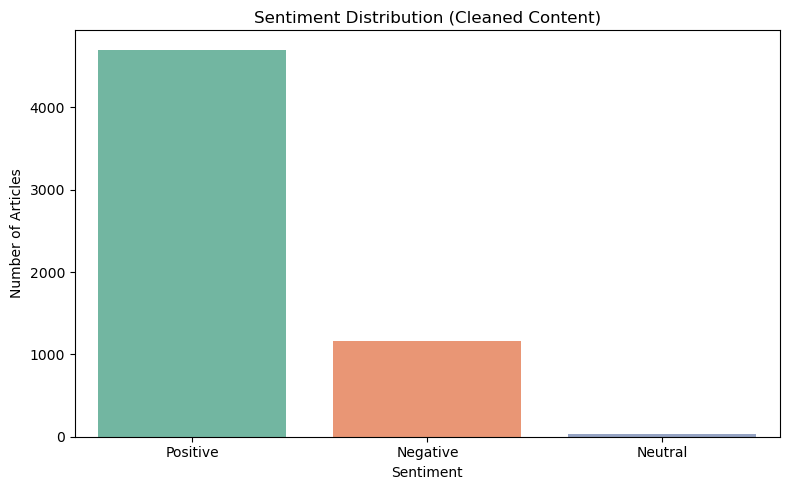

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(x='Cleaned Sentiment', data=df, hue='Cleaned Sentiment', palette='Set2', legend=False)
plt.title("Sentiment Distribution (Cleaned Content)")
plt.xlabel("Sentiment")
plt.ylabel("Number of Articles")
plt.tight_layout()
plt.show()


# Polarity Score Distribution
# Plot Type: Histogram / KDE

# Column(s): Polarity Score, Cleaned Polarity

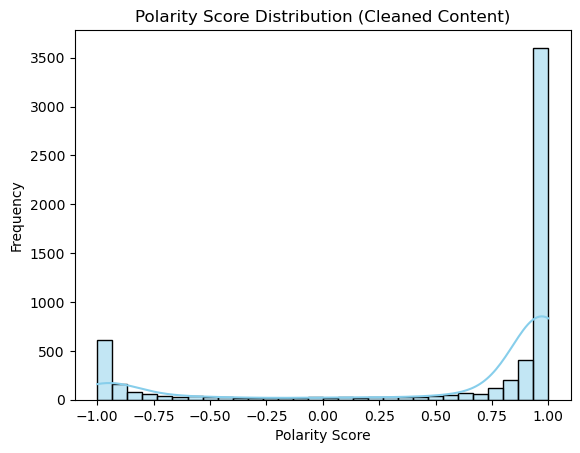

In [63]:
sns.histplot(df["Cleaned Polarity"], bins=30, kde=True, color='skyblue')
plt.title("Polarity Score Distribution (Cleaned Content)")
plt.xlabel("Polarity Score")
plt.ylabel("Frequency")
plt.show()


 # Publication Date vs Sentiment
# Plot Type: Line plot or bar plot (time series trend)

# Column(s): Published Date, Cleaned Sentiment

# Prep: Convert Published Date to datetime, group by date and sentimen

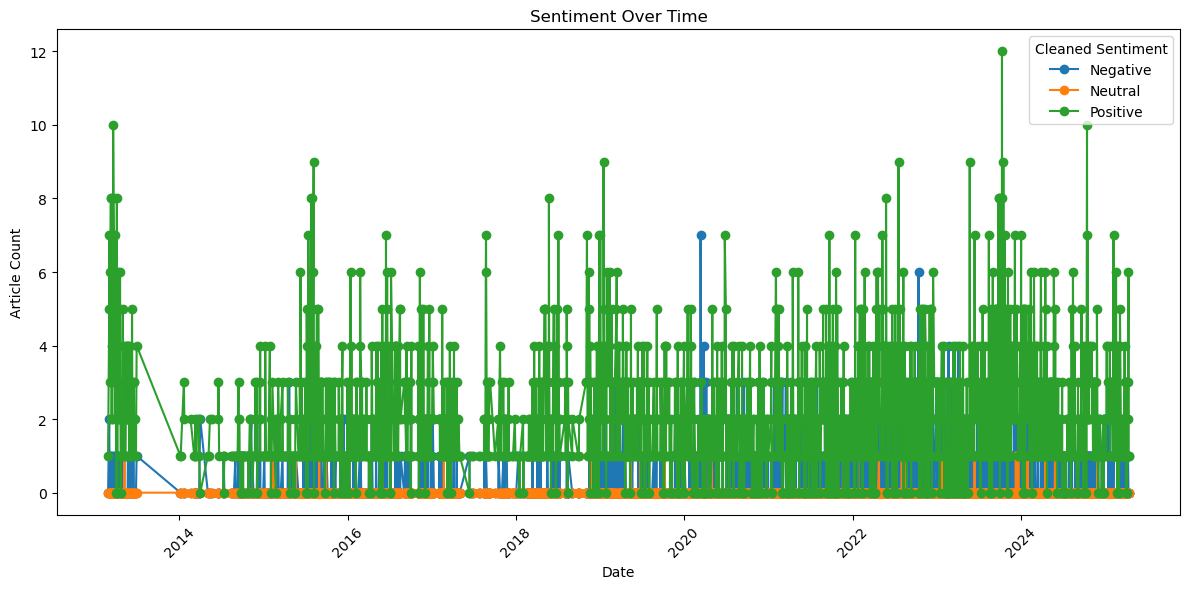

In [57]:
df["Published Date"] = pd.to_datetime(df["Published Date"], errors="coerce")
sentiment_over_time = df.groupby([df["Published Date"].dt.date, "Cleaned Sentiment"]).size().unstack().fillna(0)

sentiment_over_time.plot(kind="line", figsize=(12,6), marker="o")
plt.title("Sentiment Over Time")
plt.xlabel("Date")
plt.ylabel("Article Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


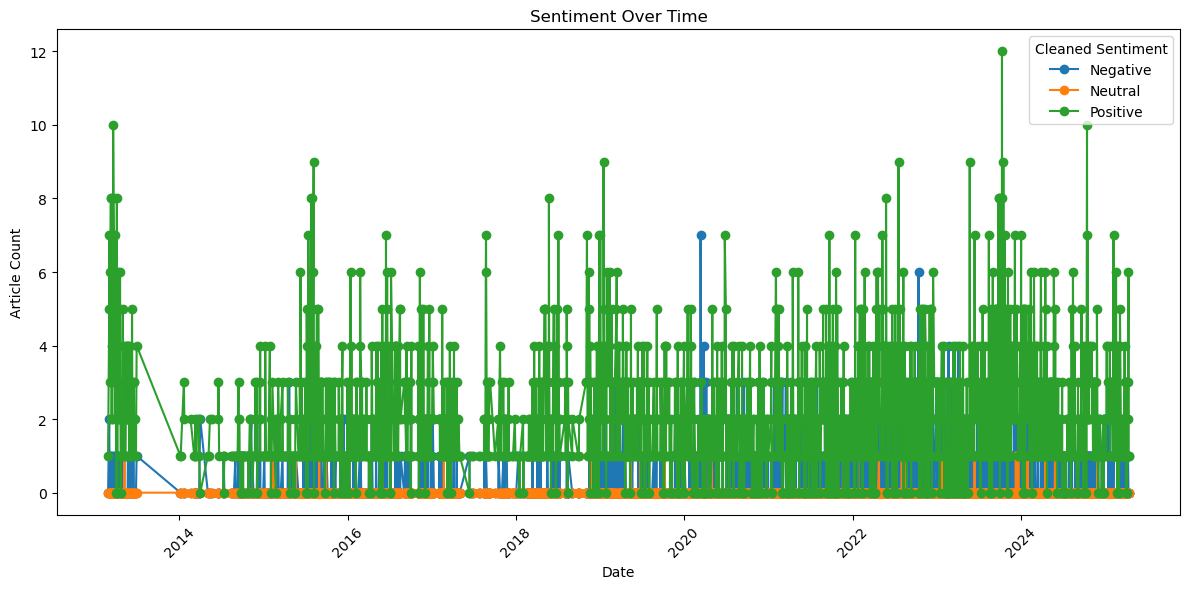

In [60]:
df["Published Date"] = pd.to_datetime(df["Published Date"], errors="coerce")
sentiment_over_time = df.groupby([df["Published Date"].dt.date, "Cleaned Sentiment"]).size().unstack().fillna(0)

sentiment_over_time.plot(kind="line", figsize=(12,6), marker="o")
plt.title("Sentiment Over Time")
plt.xlabel("Date")
plt.ylabel("Article Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Word Cloud of Keywords
# Plot Type: Word cloud

# Column(s): Keywords or Cleaned Content

# Tool: wordcloud

In [73]:
!pip install wordcloud


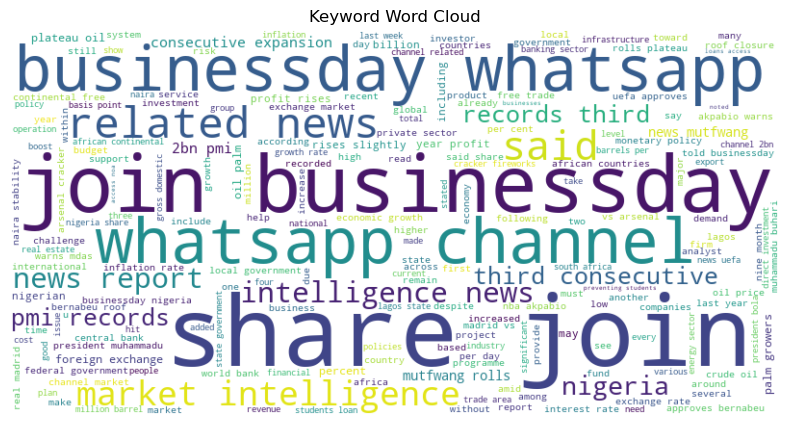

In [75]:
from wordcloud import WordCloud

text_blob = " ".join(df["Keywords"].dropna().astype(str).values)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_blob)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Keyword Word Cloud")
plt.show()
